# Machine Learning - Third Assignment - Stuedent Placement Analysis
# Mohammad Hossein Basouli - 401222020
---

# Imports

In [155]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.utils.class_weight import compute_sample_weight

pd.set_option('display.max_columns', 35)

# Loading of the dataset

In [156]:
df = pd.read_csv('./Placement_Data_Full_Class.csv')

# Exploratory Data Analysis

## Data Understanding

In [157]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [158]:
df.shape

(215, 15)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


## Data Cleaning

In [160]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

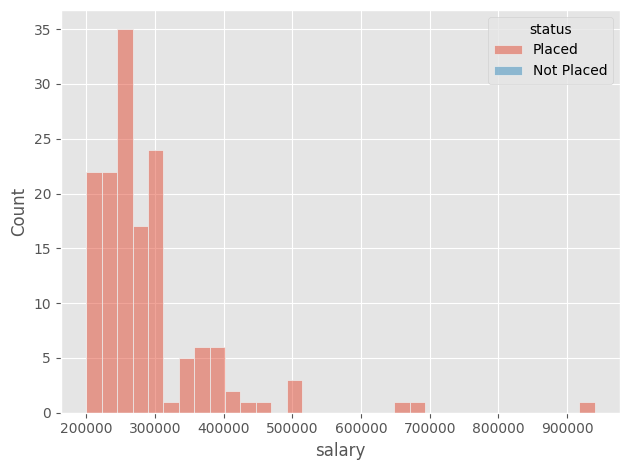

In [161]:
sns.histplot(df, x='salary', hue='status')

plt.tight_layout()
plt.show()

In [162]:
df['salary'] = df['salary'].fillna(df['salary'].median())

## Univariate Analysis

In [163]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,281283.720930
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,78232.510303
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,250000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [164]:
cat_cols = df.columns.drop(df.select_dtypes(include=['number']).columns)
for cat in cat_cols:
    display(df[cat].value_counts(normalize=True))

gender
M    0.646512
F    0.353488
Name: proportion, dtype: float64

ssc_b
Central    0.539535
Others     0.460465
Name: proportion, dtype: float64

hsc_b
Others     0.609302
Central    0.390698
Name: proportion, dtype: float64

hsc_s
Commerce    0.525581
Science     0.423256
Arts        0.051163
Name: proportion, dtype: float64

degree_t
Comm&Mgmt    0.674419
Sci&Tech     0.274419
Others       0.051163
Name: proportion, dtype: float64

workex
No     0.655814
Yes    0.344186
Name: proportion, dtype: float64

specialisation
Mkt&Fin    0.55814
Mkt&HR     0.44186
Name: proportion, dtype: float64

status
Placed        0.688372
Not Placed    0.311628
Name: proportion, dtype: float64

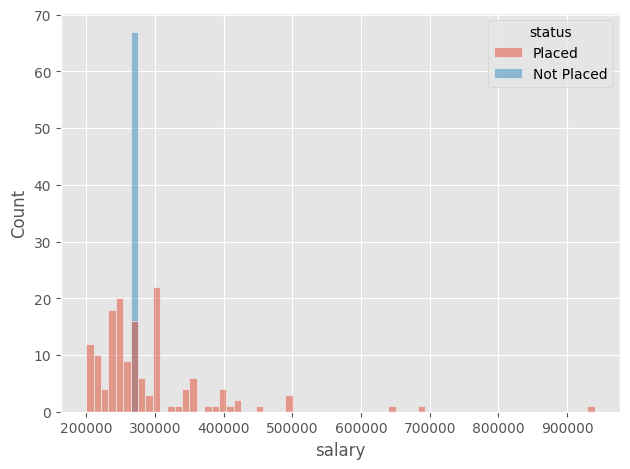

In [165]:
sns.histplot(df, x='salary', hue='status')

plt.tight_layout()
plt.show()

## Encoding of The Categorical Features

In [166]:
encoded_df = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)
encoded_df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,1,1,1,1,0,0,1,0,1,1
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,1,0,1,0,1,0,1,1,0,1
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,1,0,0,0,0,0,0,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,265000.0,1,0,0,0,1,0,1,0,1,0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.0,1,1,1,1,0,0,0,0,0,1
211,212,58.00,60.00,72.00,74.0,53.62,275000.0,1,1,1,0,1,0,1,0,0,1
212,213,67.00,67.00,73.00,59.0,69.72,295000.0,1,1,1,1,0,0,0,1,0,1
213,214,74.00,66.00,58.00,70.0,60.23,204000.0,0,1,1,1,0,0,0,0,1,1


# Model Training

1. Logistic Regression
2. Gaussian Naive Bayes
3. Linear Discriminant Analysis

Splitting of The Dataset:

In [167]:
X, y = encoded_df.drop(columns=['status_Placed', 'sl_no']), encoded_df['status_Placed']

# 1. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling of The Features:

In [168]:
# 2. Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Using **Statified K-Fold Cross Validation** For Threshold Tuning: 

In [169]:
def threshold_tuning(X_train_scaled, y_train, model):
    # Ensure y is a NumPy array
    y_train = np.array(y_train)

    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    probs = np.zeros(len(y_train))
    true = np.zeros(len(y_train))

    for train_idx, val_idx in cv.split(X_train_scaled, y_train):
        # Check if X_train_scaled is a DataFrame
        if isinstance(X_train_scaled, pd.DataFrame):
            # Use .iloc for DataFrame
            X_train_k = X_train_scaled.iloc[train_idx]
            X_val_k   = X_train_scaled.iloc[val_idx]
        else:
            # Use NumPy indexing for ndarray
            X_train_k = X_train_scaled[train_idx]
            X_val_k   = X_train_scaled[val_idx]

        # Handle y_train similarly
        if isinstance(y_train, pd.Series):
            y_train_k = y_train.iloc[train_idx]
            y_val_k   = y_train.iloc[val_idx]
        else:
            y_train_k = y_train[train_idx]
            y_val_k   = y_train[val_idx]

        model.fit(X_train_k, y_train_k)
        y_val_probs = model.predict_proba(X_val_k)[:, 1]

        probs[val_idx] = y_val_probs
        true[val_idx] = y_val_k

    precision, recall, thresholds = precision_recall_curve(true, probs)

    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
    optimal_idx = f1_scores.argmax()
    optimal_threshold = thresholds[optimal_idx]

    print(f"Optimal threshold from CV: {optimal_threshold:.2f}")

    return optimal_threshold

Evaluation of The Classification Metrics on The **Train Set** And **Test Set**: 

In [170]:
def evaluation(model, X_train_scaled, y_train, X_test_scaled, y_test, model_name, threshold):
    # Predicted probabilities for positive class
    y_train_probs = model.predict_proba(X_train_scaled)[:, 1]
    y_test_probs = model.predict_proba(X_test_scaled)[:, 1]

    # Predicted classes based on threshold
    y_train_pred = (y_train_probs >= threshold).astype(int)
    y_test_pred = (y_test_probs >= threshold).astype(int)

    # ROC
    fpr, tpr, _ = roc_curve(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_pred)

    # Precision-Recall
    precision, recall, __ = precision_recall_curve(y_test, y_test_probs)
    ap = average_precision_score(y_test, y_test_probs)

    # Train metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, zero_division=0)
    train_recall = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1 = f1_score(y_train, y_train_pred, zero_division=0)

    # Test metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, zero_division=0)

    # Print results
    print(f"--- {model_name} - Train ---")
    print(f"Accuracy : {train_accuracy}")
    print(f"Precision: {train_precision}")
    print(f"Recall   : {train_recall}")
    print(f"F1 Score : {train_f1}")

    print(f"\n--- {model_name} - Test ---")
    print(f"Accuracy : {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall   : {test_recall}")
    print(f"F1 Score : {test_f1}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)

    # Create subplots: 1 row, 3 cols
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # ROC subplot
    axes[0].plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    axes[0].plot([0, 1], [0, 1], 'k--', label='Random')
    axes[0].set_title(f'ROC Curve - {model_name}')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].legend(loc='lower right')
    axes[0].grid(True)

    # Precision-Recall subplot
    axes[1].plot(recall, precision, label=f'AP = {ap:.2f}')
    axes[1].set_title(f'Precision-Recall Curve - {model_name}')
    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precision')
    axes[1].legend(loc='lower left')
    axes[1].grid(True)

    # Confusion matrix subplot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[2], cmap=plt.cm.Blues, colorbar=False)
    axes[2].set_title(f'Confusion Matrix\nThreshold = {threshold}')
    axes[2].grid(False)

    plt.tight_layout()
    plt.show()

## 1. Logistic Regression

### 1.1 Training

In [171]:
# Logistic Regression
logreg = LR(max_iter=1000, random_state=42)
opt_treshold_logreg = threshold_tuning(X_train_scaled, y_train, logreg)
logreg.fit(X_train_scaled, y_train)

Optimal threshold from CV: 0.50


LogisticRegression(max_iter=1000, random_state=42)

### 1.2 Evaluation

--- Logistic Regression - Train ---
Accuracy : 0.9011627906976745
Precision: 0.9166666666666666
Recall   : 0.9401709401709402
F1 Score : 0.9282700421940928

--- Logistic Regression - Test ---
Accuracy : 0.8837209302325582
Precision: 0.90625
Recall   : 0.9354838709677419
F1 Score : 0.9206349206349206


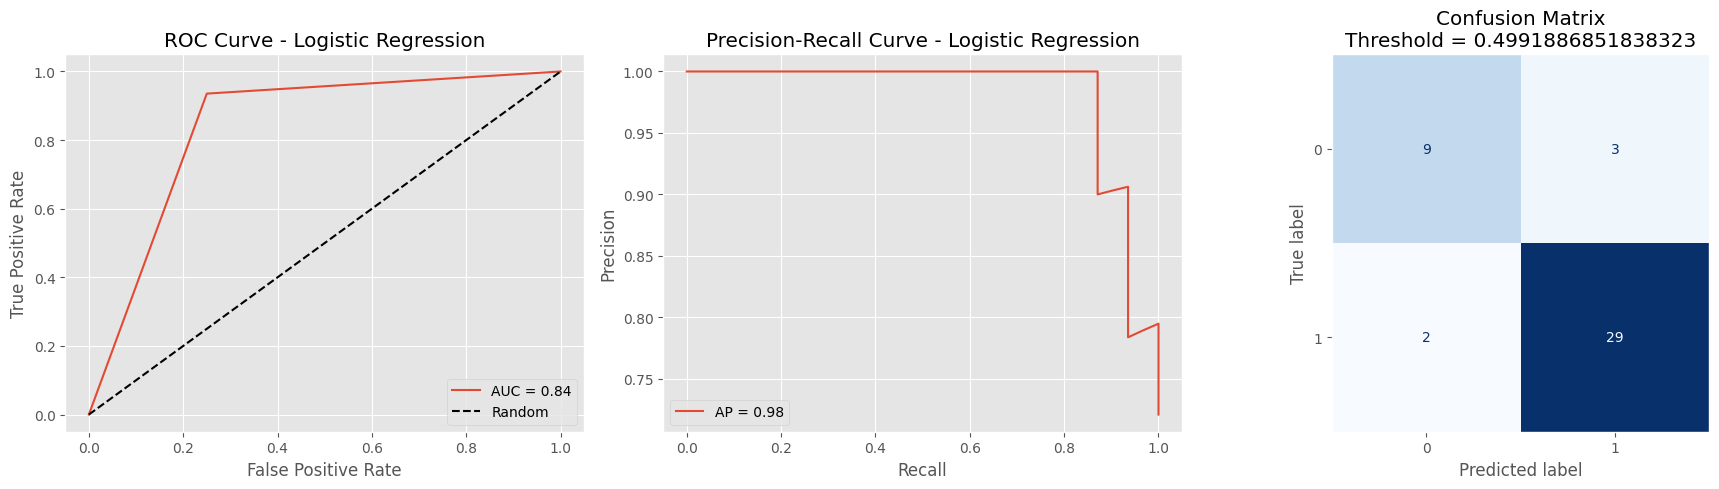

In [172]:
evaluation(logreg, X_train_scaled, y_train, X_test_scaled, y_test, 'Logistic Regression', opt_treshold_logreg)

## 2. Naive Bayes

### 2.1 Training

In [173]:
# Naive Bayes
nb = NB()
opt_treshold_nb = threshold_tuning(X_train, y_train, nb)
nb.fit(X_train_scaled, y_train)

Optimal threshold from CV: 1.00


GaussianNB()

### 2.2 Evaluation

--- Naive Bayes - Train ---
Accuracy : 0.9651162790697675
Precision: 1.0
Recall   : 0.9487179487179487
F1 Score : 0.9736842105263158

--- Naive Bayes - Test ---
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0


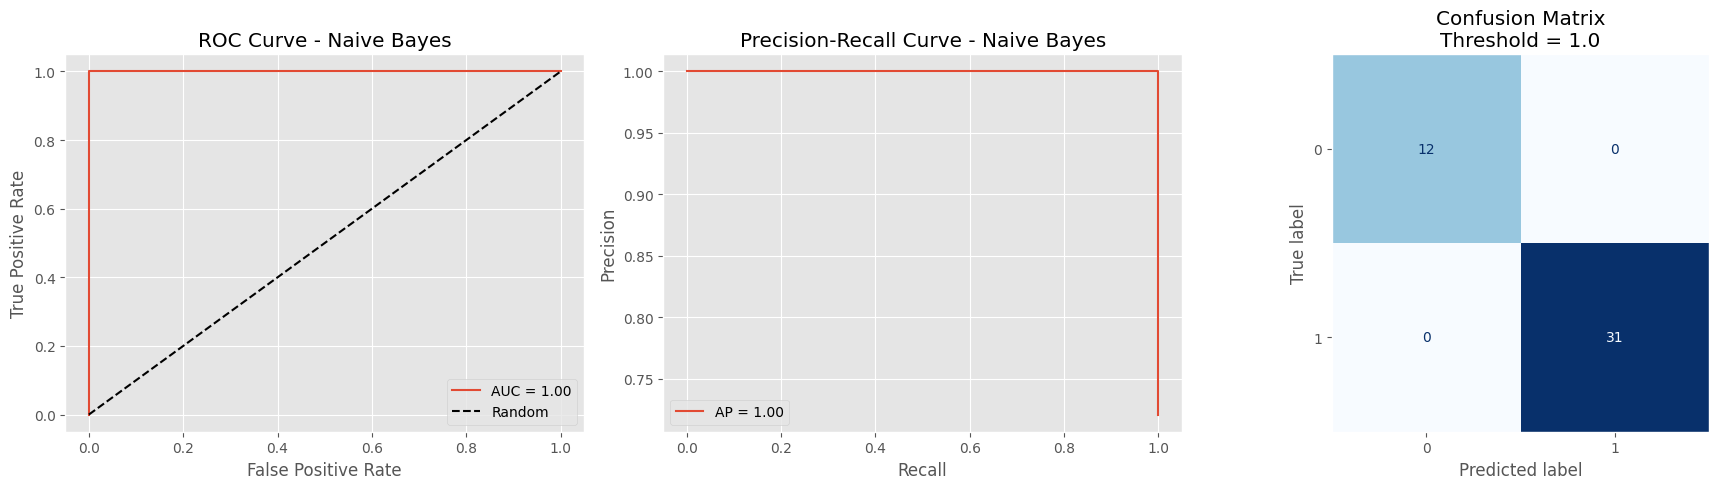

In [178]:
evaluation(nb, X_train_scaled, y_train, X_test_scaled, y_test, 'Naive Bayes', opt_treshold_nb)

## 3. Linear Discriminant Analysis

### 3.1 Training

In [175]:
# Linear Discriminant Analysis
lda = LDA()
opt_treshold_lda = threshold_tuning(X_train_scaled, y_train, lda)
lda.fit(X_train_scaled, y_train)

Optimal threshold from CV: 0.64


LinearDiscriminantAnalysis()

### 3.2 Evaluation

--- Linear Discriminant Analysis - Train ---
Accuracy : 0.9011627906976745
Precision: 0.9310344827586207
Recall   : 0.9230769230769231
F1 Score : 0.927038626609442

--- Linear Discriminant Analysis - Test ---
Accuracy : 0.8604651162790697
Precision: 0.9032258064516129
Recall   : 0.9032258064516129
F1 Score : 0.9032258064516129


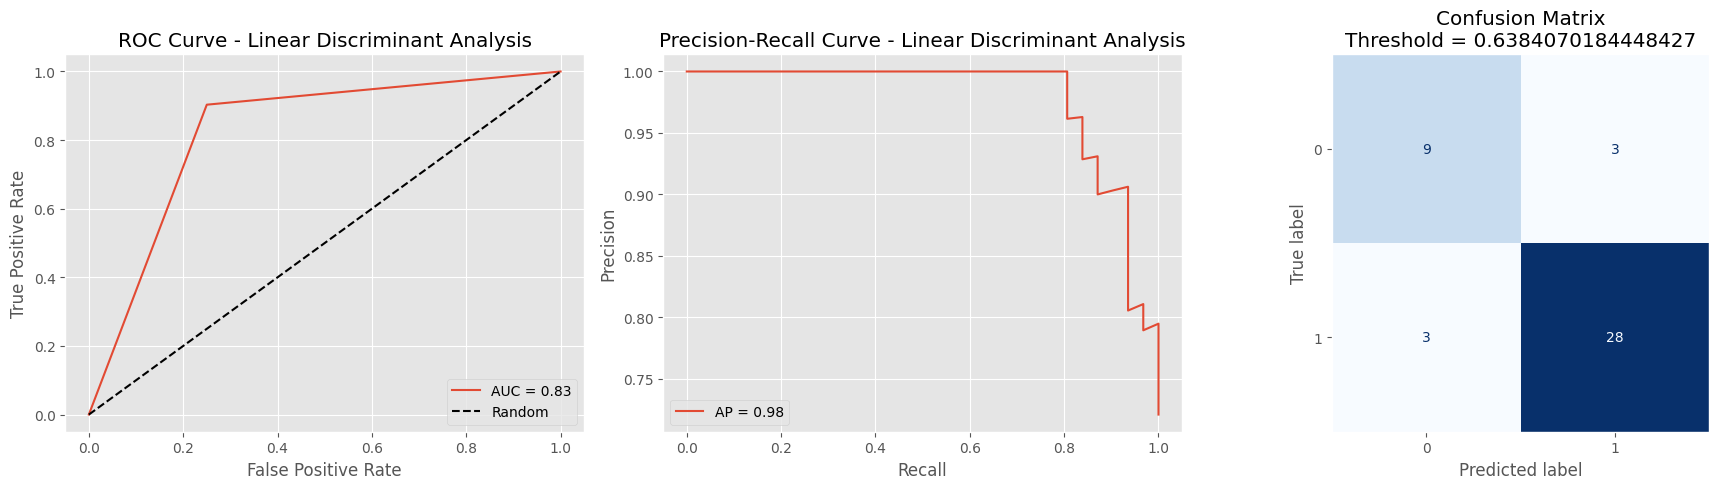

In [176]:
evaluation(lda, X_train_scaled, y_train, X_test_scaled, y_test, 'Linear Discriminant Analysis', opt_treshold_lda)